In [2]:
import psycopg2
import pandas as pd
DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)

In [3]:
pd.read_sql("SELECT * FROM pums_2018 LIMIT 10;", conn)

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2014000000079,9,01,11602,4,53,1070673,14.0,43.0,...,13.0,15.0,15.0,23.0,14.0,4.0,12.0,4.0,4.0,15.0
1,P,2014000000156,9,01,10100,4,53,1070673,16.0,88.0,...,16.0,2.0,16.0,30.0,32.0,17.0,16.0,30.0,1.0,16.0
2,P,2014000000165,9,01,11611,4,53,1070673,29.0,64.0,...,7.0,9.0,25.0,25.0,27.0,8.0,56.0,10.0,25.0,47.0
3,P,2014000000273,9,01,11503,4,53,1070673,10.0,21.0,...,1.0,9.0,15.0,16.0,18.0,10.0,9.0,8.0,9.0,15.0
4,P,2014000000275,9,01,11608,4,53,1070673,7.0,72.0,...,13.0,8.0,7.0,8.0,13.0,8.0,2.0,8.0,13.0,12.0
5,P,2014000000275,9,02,11608,4,53,1070673,8.0,70.0,...,11.0,7.0,8.0,7.0,12.0,7.0,2.0,8.0,13.0,12.0
6,P,2014000000341,9,01,11802,4,53,1070673,27.0,87.0,...,24.0,8.0,49.0,8.0,9.0,26.0,27.0,49.0,44.0,29.0
7,P,2014000000359,9,01,11606,4,53,1070673,23.0,80.0,...,8.0,38.0,23.0,24.0,22.0,39.0,24.0,7.0,23.0,6.0
8,P,2014000000359,9,02,11606,4,53,1070673,22.0,78.0,...,6.0,38.0,20.0,21.0,22.0,36.0,23.0,6.0,24.0,5.0
9,P,2014000000512,9,01,11900,4,53,1070673,24.0,46.0,...,43.0,4.0,4.0,22.0,25.0,48.0,23.0,26.0,24.0,25.0


In [4]:
pd.read_sql("""
            SELECT * 
            FROM puma_names_2010
            LIMIT 10""", conn)

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,1,Alabama ...,1,100,100100,G01000100,"Lauderdale, Colbert, Franklin & Marion (Northe..."
1,1,Alabama ...,1,800,100800,G01000800,St. Clair & Blount Counties ...
2,1,Alabama ...,1,1400,101400,G01001400,"Walker, Marion (South & West), Fayette & Lamar..."
3,1,Alabama ...,1,1500,101500,G01001500,Tuscaloosa (Outer) & Pickens Counties--Northpo...
4,1,Alabama ...,1,1600,101600,G01001600,Tuscaloosa & Northport (Southeast) Cities ...
5,1,Alabama ...,1,1700,101700,G01001700,"Dallas, Bibb, Marengo, Hale, Sumter, Perry & G..."
6,1,Alabama ...,2,200,100200,G01000200,Limestone & Madison (Outer) Counties--Huntsvil...
7,1,Alabama ...,2,301,100301,G01000301,Huntsville (North) & Madison (East) Cities ...
8,1,Alabama ...,2,302,100302,G01000302,Huntsville City (Central & South) ...
9,1,Alabama ...,2,500,100500,G01000500,Marshall & Madison (Southeast) Counties--Hunts...


In [4]:
pd.read_sql("""
            SELECT *
            FROM puma_names_2010
            WHERE state_name = 'Washington'
            AND puma_name like ('King%South%') and puma_name not like ('%North%')
            LIMIT 10""", conn)

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
1,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
2,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
3,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


In [5]:
#SKC age dist
SKCAge = pd.read_sql("""
            SELECT agep
            FROM pums_2017
            WHERE puma in (SELECT puma
                            FROM puma_names_2010
                            WHERE state_name = 'Washington'
                            AND puma_name like ('King%South%') 
                            AND puma_name not like ('%North%'))
            ORDER BY agep DESC""",conn)

In [6]:
#histogram of age distrubution in South King County
import matplotlib.pyplot as plt

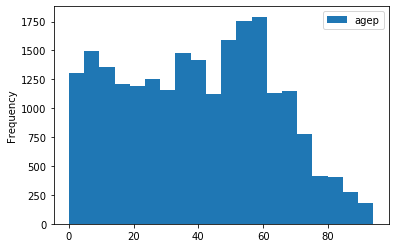

In [7]:
SKCAge.plot.hist(bins = 20);

In [8]:
KCAge = pd.read_sql("""
            SELECT agep
            FROM pums_2017
            WHERE puma in(SELECT puma
                            FROM puma_names_2010
                            WHERE state_name = 'Washington'
                            AND puma_name like ('King%'))""", conn)
KCAge

,agep
0,68.0
1,66.0
2,40.0
3,11.0
4,9.0
...,...
66668,94.0
66669,57.0
66670,87.0
66671,72.0


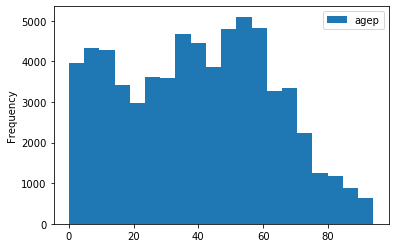

In [9]:
KCAge.plot.hist(bins = 20);

In [11]:
WSAge = pd.read_sql("""
                    SELECT agep
                    FROM pums_2017
                    WHERE puma in(SELECT puma
                                  FROM puma_names_2010
                                  WHERE state_name = 'Washington')
                    """, conn)
WSAge

,agep
0,68.0
1,66.0
2,72.0
3,64.0
4,52.0
...,...
359070,22.0
359071,19.0
359072,19.0
359073,87.0


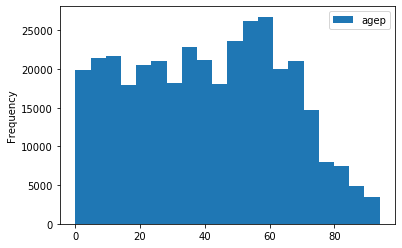

In [12]:
WSAge.plot.hist(bins = 20);

In [66]:
SKCAge.mean()

agep    39.681863
dtype: float64

In [67]:
SKCAge.mode()

,agep
0,55.0


In [70]:
SKCAge.median()

agep    40.0
dtype: float64

In [71]:
KCAge.mean()

agep    39.723111
dtype: float64

In [72]:
KCAge.median()

agep    40.0
dtype: float64

In [73]:
KCAge.mode()

,agep
0,55.0


In [74]:
WSAge.mean()

agep    40.780453
dtype: float64

In [75]:
WSAge.median()

agep    41.0
dtype: float64

In [76]:
WSAge.mode()

,agep
0,55.0


In [91]:
AgeDist = pd.read_sql("""
                      SELECT puma_name, avg(agep)
                      FROM pums_2017 p
                      JOIN puma_names_2010 n on p.puma = n.puma
                      WHERE state_name = 'Washington'
                      AND puma_name like ('King%')
                      GROUP BY puma_name
                      ORDER BY puma_name""",conn)
AgeDist

,puma_name,avg
0,"King County (Central)--Renton City, Fairwood, ...",39.597947
1,"King County (Central)--Sammamish, Issaquah, Me...",38.423367
2,"King County (Far Southwest)--Federal Way, Des ...",41.951788
3,"King County (Northeast)--Snoqualmie City, Cott...",39.184626
4,King County (Northwest Central)--Greater Belle...,40.681191
5,"King County (Northwest)--Redmond, Kirkland Cit...",38.347694
6,"King County (Northwest)--Shoreline, Kenmore & ...",41.582692
7,"King County (Southeast)--Maple Valley, Covingt...",39.306586
8,King County (Southwest Central)--Kent City ...,38.456898
9,King County (Southwest)--Auburn City & Lakelan...,39.239892


In [101]:
pd.read_sql("SELECT DISTINCT state_name, * FROM puma_names_2010 pn",conn)

,state_name,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,Virginia ...,51,Virginia ...,1019,51040,5151040,G51051040,New River Valley Planning District Commission ...
1,Texas ...,48,Texas ...,990,4607,4804607,G48004607,Houston City (Northeast)--Between Loop I-610 &...
2,North Carolina ...,37,North Carolina ...,766,1704,3701704,G37001704,Guilford County (South)--High Point City ...
3,Hawaii ...,15,Hawaii ...,289,306,1500306,G15000306,Honolulu County--Moanalua to Pearl City ...
4,Oklahoma ...,40,Oklahoma ...,829,1501,4001501,G40001501,"Payne, Seminole, Creek (Southwest), Hughes & O..."
...,...,...,...,...,...,...,...,...
2373,Ohio ...,39,Ohio ...,796,1300,3901300,G39001300,Ashtabula County ...
2374,Mississippi ...,28,Mississippi ...,544,900,2800900,G28000900,Central Region--Madison & Yazoo Counties ...
2375,Illinois ...,17,Illinois ...,335,3523,1703523,G17003523,"Chicago City (West)--North & South Lawndale, H..."
2376,Kentucky ...,21,Kentucky ...,396,2000,2102000,G21002000,Bluegrass Area Development District (West) ...


In [104]:
pd.read_sql("""SELECT rtrim(puma_name), agep, cit, cow, dear, deye, 
               hins4, hins5, hins7, mar, mig, nwav, pap, sch, schg, 
               schl, sex, nop, oc, fesrp, pwgtp
               FROM pums_2017 p
               JOIN puma_names_2010 n on p.puma = n.puma
               WHERE state_name = 'Washington'
               AND puma_name like ('King%')
               ORDER BY puma_name DESC""",conn)

,rtrim,agep,cit,cow,dear,deye,hins4,hins5,hins7,mar,...,nwav,pap,sch,schg,schl,sex,nop,oc,fesrp,pwgtp
0,"King County (West Central)--Burien, SeaTac, Tu...",10.0,1.0,None,2,2,2,2,2,5,...,None,NaN,3,07,07,1,1,1,0,64.0
1,"King County (West Central)--Burien, SeaTac, Tu...",39.0,1.0,1,2,2,2,2,2,5,...,5,0.0,1,None,19,1,None,0,0,20.0
2,"King County (West Central)--Burien, SeaTac, Tu...",33.0,1.0,1,2,2,2,2,2,2,...,1,0.0,2,15,20,1,None,0,0,21.0
3,"King County (West Central)--Burien, SeaTac, Tu...",21.0,1.0,1,2,2,2,2,2,5,...,1,2000.0,1,None,16,1,None,0,0,20.0
4,"King County (West Central)--Burien, SeaTac, Tu...",14.0,1.0,None,2,2,2,2,2,5,...,None,NaN,3,09,09,1,1,1,0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66668,"King County (Central)--Renton City, Fairwood, ...",46.0,4.0,6,2,2,1,2,2,5,...,5,0.0,1,None,17,1,None,0,1,19.0
66669,"King County (Central)--Renton City, Fairwood, ...",71.0,4.0,None,2,1,1,2,2,2,...,5,550.0,1,None,19,2,None,0,0,18.0
66670,"King County (Central)--Renton City, Fairwood, ...",12.0,1.0,None,2,2,2,2,2,5,...,None,NaN,2,08,09,1,1,1,0,12.0
66671,"King County (Central)--Renton City, Fairwood, ...",15.0,1.0,None,2,2,2,2,2,5,...,None,0.0,2,11,12,2,1,1,0,16.0


In [108]:
pd.read_sql("""
            SELECT p.puma, rtrim(puma_name), agep, SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND puma_name LIKE ('King%South%')
            AND puma_name NOT LIKE ('%North%')
            AND agep BETWEEN 16 AND 24
            GROUP BY agep, rtrim(puma_name), p.puma
            ORDER BY agep DESC""", conn)


,puma,rtrim,agep,weighted_total
0,11612,"King County (Far Southwest)--Federal Way, Des ...",24.0,1855.0
1,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,947.0
2,11613,King County (Southwest Central)--Kent City,24.0,1889.0
3,11614,King County (Southwest)--Auburn City & Lakeland,24.0,1759.0
4,11612,"King County (Far Southwest)--Federal Way, Des ...",23.0,1821.0
5,11615,"King County (Southeast)--Maple Valley, Covingt...",23.0,824.0
6,11613,King County (Southwest Central)--Kent City,23.0,2487.0
7,11614,King County (Southwest)--Auburn City & Lakeland,23.0,1476.0
8,11612,"King County (Far Southwest)--Federal Way, Des ...",22.0,1858.0
9,11615,"King County (Southeast)--Maple Valley, Covingt...",22.0,1254.0


In [130]:
pd.read_sql("""
            SELECT agep, SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611', '11612','11613','11614','11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY agep
            ORDER BY agep DESC""", conn)

,agep,weighted_total
0,24.0,10486.0
1,23.0,10219.0
2,22.0,9551.0
3,21.0,8276.0
4,20.0,9121.0
5,19.0,8089.0
6,18.0,9413.0
7,17.0,10321.0
8,16.0,10407.0


In [129]:
pd.read_sql("""
            SELECT SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611', '11612','11613','11614','11615')
            AND agep BETWEEN 16 AND 24""", conn)

,weighted_total
0,85883.0


In [135]:
pd.read_sql("""
            SELECT SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611','11612','11613','11614','11615')
            AND agep BETWEEN 16 AND 24
            AND p.sch = '1' 
            AND p.esr IN ('3','6')
            """, conn)

,weighted_total
0,10614.0


In [136]:
sking = pd.read_sql("""
            SELECT p.puma, rtrim(puma_name), agep, 
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611', '11612','11613','11614','11615')
            AND p.sch = '1' 
            AND p.esr IN ('3','6')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC""", conn)
sking

,puma,rtrim,agep,school,education_attainment,disability_status,parent_employment,employment_status,gender,indp,povpip,weighted_total
0,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,0770,197.0,36.0
1,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,1270,204.0,39.0
2,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,male,4470,113.0,45.0
3,11613,King County (Southwest Central)--Kent City,24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5380,0.0,46.0
4,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,Unemployed/not in labor force,female,5380,501.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,One or both parents in labor force,Unemployed/not in labor force,male,None,500.0,26.0
382,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,One or both parents in labor force,Unemployed/not in labor force,female,None,501.0,22.0
383,11611,"King County (West Central)--Burien, SeaTac, Tu...",16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,0.0,12.0
384,11614,King County (Southwest)--Auburn City & Lakeland,16.0,Has not attended in last 3 months,No HS or GED,no reported disability,None,Unemployed/not in labor force,male,None,39.0,45.0


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
data = pd.read_sql("""
            SELECT p.puma, SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611','11612','11613','11614','11615')
            AND agep BETWEEN 16 AND 24
            AND p.sch = '1' 
            AND p.esr IN ('3','6')
            GROUP BY p.puma
            """, conn)
data

,puma,weighted_total
0,11610,1853.0
1,11611,2038.0
2,11612,1977.0
3,11613,2006.0
4,11614,1530.0
5,11615,1210.0


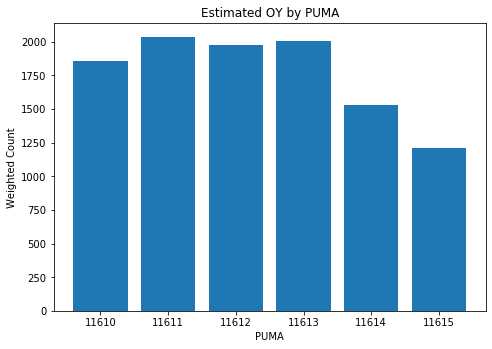

In [174]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
puma = data.puma
total = data.weighted_total
ax.set_title('Estimated OY by PUMA')
ax.set_xlabel('PUMA')
ax.set_ylabel('Weighted Count')
ax.bar(puma,total)
plt.savefig('OYbyPuma.png')
plt.show;


In [167]:
data2 = pd.read_sql("""
            SELECT p.agep, SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610','11611','11612','11613','11614','11615')
            AND agep BETWEEN 16 AND 24
            AND p.sch = '1' 
            AND p.esr IN ('3','6')
            GROUP BY p.agep
            """, conn)
data2

,agep,weighted_total
0,16.0,318.0
1,17.0,293.0
2,18.0,1204.0
3,19.0,1402.0
4,20.0,1063.0
5,21.0,1437.0
6,22.0,1553.0
7,23.0,1842.0
8,24.0,1502.0


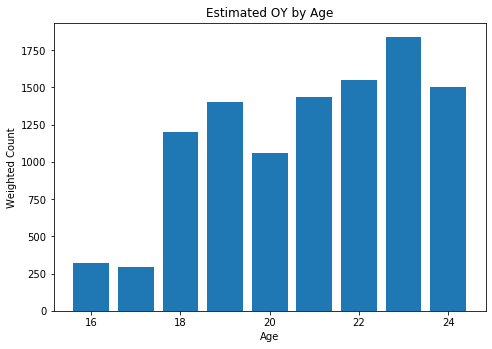

In [173]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = data2.agep
total = data2.weighted_total
ax.set_title('Estimated OY by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Weighted Count')
ax.bar(age,total)
plt.savefig('OYbyAge.pdf')
plt.show;

